### import libraries

In [1]:
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

initialize api keys for twitter api

In [2]:
consumer_key = '****************'
consumer_secret = '****************'
access_token = '****************'
access_token_secret = '****************'
bearer_token = '****************'

authenticate with api keys

In [3]:
authner = tweepy.OAuthHandler(consumer_key, consumer_secret)
authner.set_access_token(access_token, access_token_secret)
api = tweepy.API(authner, wait_on_rate_limit=True,)

In [4]:
username = 'qrussell_'
count = 150

scrape for data on account with username qussell_ for the attributes listed below

In [5]:
df_user_tweets = pd.DataFrame()
try:     
    # Creation of query method using appropriate parameters
    tweets =    tweepy.Cursor(api.user_timeline,id=username).items(count)
 
    
    # Pulling information from tweets iterable object and adding relevant tweet information in our data frame
    for tweet in tweets:
        df_user_tweets = df_user_tweets.append(
                          {'Created at' : tweet._json['created_at'],
                                       'User ID': tweet._json['id'],
                              'User Name': tweet.user._json['name'],
                                        'Text': tweet._json['text'],
                     'Description': tweet.user._json['description'],
                           'Location': tweet.user._json['location'],
             'Followers Count': tweet.user._json['followers_count'],
                 'Friends Count': tweet.user._json['friends_count'],
               'Statuses Count': tweet.user._json['statuses_count'],
         'Profile Image Url': tweet.user._json['profile_image_url'],
                         }, ignore_index=True)
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

Unexpected parameter: id
C:\Users\russe\AppData\Local\Temp\ipykernel_14460\1657762795.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_user_tweets = df_user_tweets.append(
C:\Users\russe\AppData\Local\Temp\ipykernel_14460\1657762795.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_user_tweets = df_user_tweets.append(
C:\Users\russe\AppData\Local\Temp\ipykernel_14460\1657762795.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_user_tweets = df_user_tweets.append(
C:\Users\russe\AppData\Local\Temp\ipykernel_14460\1657762795.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_user_tweets = df_user_tweets.append(
C:\User

In [6]:
df_user_tweets.shape
(150, 10)
df_user_tweets.head()

,Created at,User ID,User Name,Text,Description,Location,Followers Count,Friends Count,Statuses Count,Profile Image Url
0,Wed Sep 21 18:00:16 +0000 2022,1572646910699126786,Russ,@Daquiver1 I'm adding 'human compiler' to my r...,"Software Engineer (Django, React, React Native...","Accra, Ghana",325,736,1050,http://pbs.twimg.com/profile_images/1328751330...
1,Wed Aug 31 10:08:57 +0000 2022,1564918154215804929,Russ,RT @UnivofGh: Join us in the excitement as we ...,"Software Engineer (Django, React, React Native...","Accra, Ghana",325,736,1050,http://pbs.twimg.com/profile_images/1328751330...
2,Sun Aug 07 12:13:16 +0000 2022,1556252129421041667,Russ,@Daquiver1 @TrollFootball 😂😂😂it will soon happen,"Software Engineer (Django, React, React Native...","Accra, Ghana",325,736,1050,http://pbs.twimg.com/profile_images/1328751330...
3,Mon Jul 25 07:13:52 +0000 2022,1551465744545841152,Russ,@kwabsly @The1stGentleman 🤣🤣🤣🤣,"Software Engineer (Django, React, React Native...","Accra, Ghana",325,736,1050,http://pbs.twimg.com/profile_images/1328751330...
4,Tue Jul 19 07:29:26 +0000 2022,1549295334702055426,Russ,RT @alexstyl: The final chapters of my book 'V...,"Software Engineer (Django, React, React Native...","Accra, Ghana",325,736,1050,http://pbs.twimg.com/profile_images/1328751330...


In [50]:
#obtaining the tweets from Text column and storing it in a list
tweets = df_user_tweets['Text'].tolist()

#cocatenating all the tweets into a single string
tweets = ' '.join(tweets)

In [7]:
from rank_text import TextRank

In [51]:
print(tweets)

@Daquiver1 I'm adding 'human compiler' to my resume today RT @UnivofGh: Join us in the excitement as we celebrate how far we have come as a University. Tweet at us using #UGIS75. https://t.co/tRABJ… @Daquiver1 @TrollFootball 😂😂😂it will soon happen @kwabsly @The1stGentleman 🤣🤣🤣🤣 RT @alexstyl: The final chapters of my book 'View to Composable' are finally out 🚀

2 months in the making, the book promises you to be abl… RT @MetaAI: Excited to announce Make-A-Scene, our latest research tool Mark Zuckerberg just shared. Make-A-Scene is an exploratory concept… I passed all the test cases
Kotlin is really fun
@AndroidDev https://t.co/gAM7WP7nnb RT @NASA: It's here–the deepest, sharpest infrared view of the universe to date: Webb's First Deep Field.

Previewed by @POTUS on July 11,… RT @purplestringsgh: Now this is Something @Gyakie_ 😎🎻🔥💜 https://t.co/7r01Kjrcw4 RT @Gyakie_: HI GUYS,
SOMETHING VISUALS OUT NOW 💛
https://t.co/Xldz9w5wZs 🎬 https://t.co/UXozAoD9kN RT @bapness: 🚨 NOUVELLE VIDÉO

🤔 M

perform initial preprocessing on cocatenated tweets

In [58]:
#intial processing of the tweets
import re

#removing the links
tweets = re.sub(r'http\S+', '', tweets)

#removing the special characters
tweets = re.sub(r'\W', ' ', tweets)

#removing the single characters
tweets = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweets)

#remove hashtags and mentions
tweets = re.sub(r'#', '', tweets)
tweets = re.sub(r'@', '', tweets)

#remove RT
tweets = re.sub(r'RT', '', tweets)

#lowercase the tweets
tweets = tweets.lower()


instantiate text rank class

In [59]:

tr4w = TextRank()
tr4w.analyze(tweets, candidate_pos = ['NOUN', 'PROPN'], window_size=4, lower=False)
tr4w.get_keywords(20)


svpino - 8.003138160256158
learning - 7.419419651854329
machine - 5.933918628225809
python - 5.816744877517964
data - 5.196746987247067
course - 4.156179117881827
freecodecamp - 3.557088872181982
ml - 2.915501069552244
model - 2.8179649940913793
programming - 2.6515090531477545
app - 2.595532185231769
ivybarley - 2.5943613400184207
django - 2.5474189505934155
research - 2.4186850917728315
docker - 2.3938326079882843
amp - 2.3337684649794883
don - 2.2609875986012606
space - 2.2604447329584376
google - 2.228145520250392
science - 2.201469808862067
people - 2.156194751524654
models - 2.147680467788544


In [9]:
user_id = api.get_user(screen_name='qrussell_').id

In [10]:
print(user_id)

2971178127


create dataframe containing followers of qrussell_

In [11]:
followers = []
user_list = ["1210627806"]
list_of_followers = []

for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user_id).pages():
            followers.extend(page)
    except tweepy.errors.TweepyException as e:
        print(e)
        continue
    list_of_followers.append(followers)


In [12]:
connection_df = pd.DataFrame(columns=['user_id', 'follower_id'])

connection_df['follower_id'] = list_of_followers[0]
connection_df['user_id'] = user_id

import networkx library for network analysis

In [13]:
import networkx as nx


convert dataframe into directed graph

In [14]:
graph = nx.from_pandas_edgelist(connection_df, 'user_id', 'follower_id', create_using=nx.DiGraph())
pos = nx.spring_layout(graph)

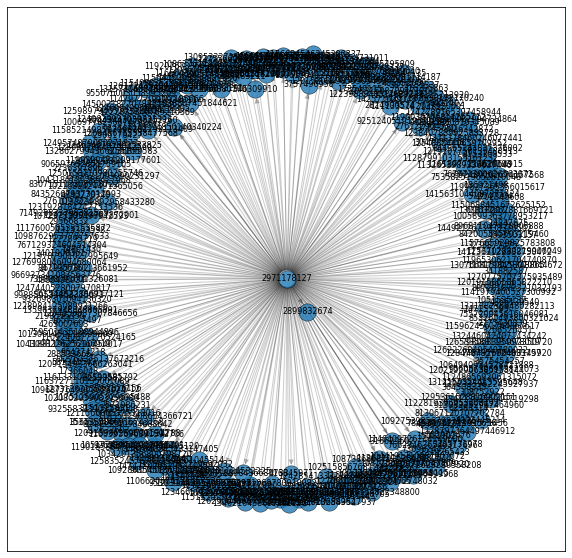

In [15]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(graph, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(graph, pos, font_size=8)
nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.2)

In [ ]:
list_of_followers = list(connection_df['follower_id'])

for id in list_of_followers:
    followers = []
    new_list_of_followers = []
    
    user = api.get_user(user_id = id)
   
    followers_count = user.followers_count
    print(user.screen_name)

    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=id).pages():
            followers.extend(page)
            time.sleep(100)
            if len(followers) > 1000:
                break
    except tweepy.errors.TweepyException as e:
        print(e)
        time.sleep(100)
        continue
    new_list_of_followers.append(followers)

    temp_df = pd.DataFrame(columns=['user_id', 'follower_id'])
    temp_df['follower_id'] = new_list_of_followers[0]
    temp_df['user_id'] = id
    connection_df = connection_df.append(temp_df, ignore_index=True)
    #save data as csv
    connection_df.to_csv('connection_df.csv', index=False)

In [41]:
extended_connection_df = pd.read_csv('connection_df.csv')
graph = nx.from_pandas_edgelist(extended_connection_df, 'user_id', 'follower_id')

In [42]:
connection_df.head()

,user_id,follower_id
0,2971178127,1307668150029348865
1,2971178127,1205143530106167296
2,2971178127,1555273402675601408
3,2971178127,932698301694136320
4,2971178127,1124865692061315072


In [43]:
print(graph.number_of_nodes(), graph.number_of_edges())

9187 9339


In [44]:
sorted_graph = pd.DataFrame(sorted(graph.degree, key=lambda x: x[1], reverse=True), columns=['user_id', 'degree'])
print(sorted_graph.head())

        user_id  degree
0  9.326983e+17    5000
1  8.972819e+17    1223
2  1.211567e+18     700
3  1.122819e+18     409
4  1.462898e+18     346


In [45]:
user_with_heighest_degree = sorted_graph['user_id'].iloc[0]
print(user_with_heighest_degree)

9.326983016941363e+17


In [46]:
from community import community_louvain
partition = community_louvain.best_partition(graph)

#convert partition to df
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [47]:
combined_df = pd.merge(sorted_graph, partition1, left_on='user_id', right_on='names', how='left')
combined_df.drop('names', axis=1, inplace=True)

In [48]:
combined_df.head()

,user_id,degree,group
0,9.326983e+17,5000,4.0
1,8.972819e+17,1223,16.0
2,8.972819e+17,1223,16.0
3,1.211567e+18,700,8.0
4,1.122819e+18,409,3.0


In [ ]:
pos = nx.spring_layout(graph)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
#cc = nx.betweenness_centrality(G2)
nodes = nx.draw_networkx_nodes(graph, pos,
                               cmap=plt.cm.Set1,
                               node_color=combined_df['group'],
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(graph, pos, font_size=8)
nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.2)
plt.savefig('followergraph.png')

In [ ]:
plt.show()